#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [40]:
# Read CSV
url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv"
df = pd.read_csv(url)

print(df.head(5))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [43]:
duplicates = df[df.duplicated()]
if not duplicates.empty:
    print("True")
else:
    print("False")

True


Periksa apakah ada missing values

In [44]:
missing_values = df.isnull().any()
print(missing_values)

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool


Periksa outlier dengan boxplot untuk setiap kolom feature

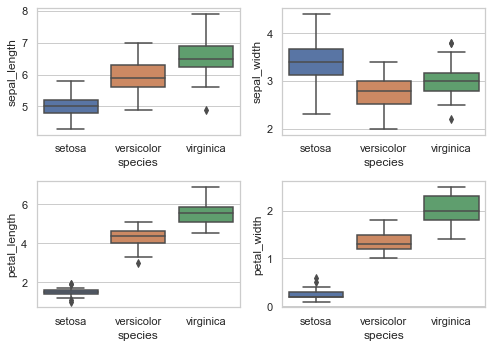

In [45]:
plt.figure(figsize=(7, 5))
sns.set(style="whitegrid")

for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=col, data=df)
 
plt.tight_layout()
plt.show()

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [46]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
Y = df['species']

print("Independent variables:")
print(X.head())
print("\nDependent variable:")
print(Y.head())

Independent variables:
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

Dependent variable:
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object


Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [47]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
Y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print("Train set - X shape:", X_train.shape)
print("Train set - y shape:", y_train.shape)
print("Test set - X shape:", X_test.shape)
print("Test set - y shape:", y_test.shape)

Train set - X shape: (135, 4)
Train set - y shape: (135,)
Test set - X shape: (15, 4)
Test set - y shape: (15,)


Lakukan fitur scaling pada variabel X_train dan X_test. 

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled X_train:")
print(pd.DataFrame(X_train_scaled, columns=X.columns).head())
print("\nScaled X_test:")
print(pd.DataFrame(X_test_scaled, columns=X.columns).head())

Scaled X_train:
   sepal_length  sepal_width  petal_length  petal_width
0      0.555556     0.541667      0.649123     0.625000
1      0.611111     0.416667      0.842105     0.875000
2      0.361111     0.208333      0.508772     0.416667
3      0.388889     0.333333      0.614035     0.500000
4      0.583333     0.333333      0.807018     0.875000

Scaled X_test:
   sepal_length  sepal_width  petal_length  petal_width
0      0.500000     0.333333      0.649123     0.458333
1      0.388889     0.750000      0.122807     0.083333
2      0.944444     0.250000      1.035088     0.916667
3      0.472222     0.375000      0.614035     0.583333
4      0.694444     0.333333      0.666667     0.541667


#Logistic Regression

Bangun model dan ukur accuracy nya

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv"

model = SVC(kernel='linear', random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


Uji model dengan dataset test

In [54]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVC(kernel='linear', random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print(y_pred)

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa']


In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix")
print(conf_matrix)
print("Accuracy Score: ", accuracy)

Confusion Matrix
[[6 0 0]
 [0 6 0]
 [0 0 3]]
Accuracy Score:  1.0


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [56]:
from sklearn.metrics import accuracy_score
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

Uji hasil model dengan data test

In [58]:
from sklearn.preprocessing import LabelEncoder

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predicted_species = label_encoder.inverse_transform(y_pred)
print(predicted_species)

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy: ", accuracy)

Confusion Matrix:
[[6 0 0]
 [0 6 0]
 [0 0 3]]
Accuracy:  1.0


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [33]:
model = KNeighborsClassifier(metric='euclidean')
model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

Uji model dengan data test

In [35]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']
y_pred = model.predict(X_test)
predicted_species = label_encoder.inverse_transform(y_pred)
print(predicted_species)

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa']


Ukur akurasi dari model K-Nearest Neighbor

In [62]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
model = KNeighborsClassifier(metric='euclidean')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy Score: ", accuracy)

Confusion Matrix:
[[6 0 0]
 [0 6 0]
 [0 0 3]]
Accuracy Score:  1.0


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah 1.0